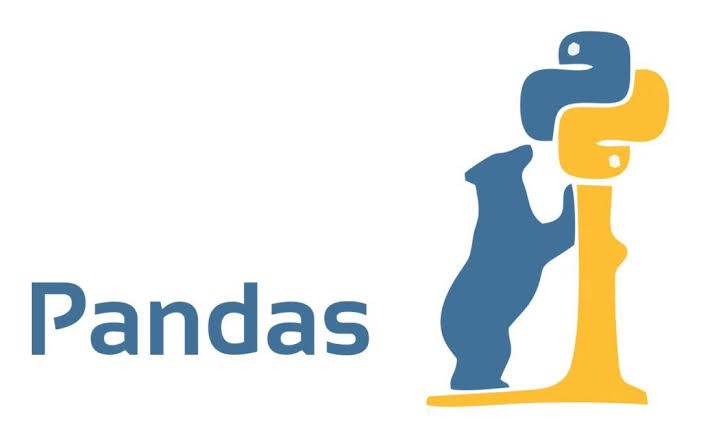

`pd.cut()` 함수와 `pd.cut()` 함수를 이용하여 수치형 변수를 특정 구간으로 나눈 범주형 레이블을 생성할 수 있다. 위 함수들을 이용하여 특정 구간들에 대한 그룹별 통계량을 구하는 것이 가능해진다.

위의 두 함수의 차이점은 아래의 도표를 통해 이해할 수 있다. cut은 데이터를 동일한 길이로 나누는 것이고 qcut은 동일한 갯수로 나누는 것이다.

이해를 돕기위해 다양한 예제를 다루어보자

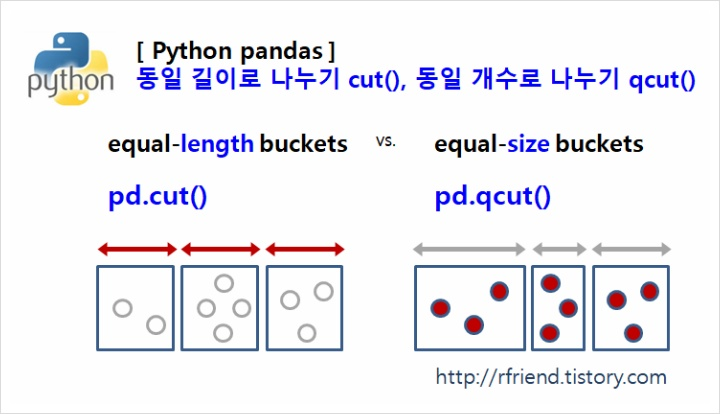

# pd.cut
---

먼저 예제로 사용할 타이타닉 데이터를 불러온다.

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


위 데이터에서 수치형 변수로 age 컬럼이 존재한다. 이 age 컬럼에서 특정 구간을 나누어 다양한 연령대 그룹을 만들고 싶은 경우 pd.cut 혹은 pd.qcut 함수를 사용할 수 있다.

먼저 cut 함수에 대해 살펴보자

cut 함수의 사용방법은 [데이터, 구간의 갯수, 레이블명] 에 해당하는 인자값을 지정해주는 것이다.

labels를 지정하지 않으면 구간의 나눈 기준이 레이블명으로 지정된다.

In [10]:
titanic['age_class'] = pd.cut(titanic['age'], 3, labels=['child', 'young', 'old'])
titanic[['age', 'age_class']].head()

,age,age_class
0,22.0,child
1,38.0,young
2,26.0,child
3,35.0,young
4,35.0,young


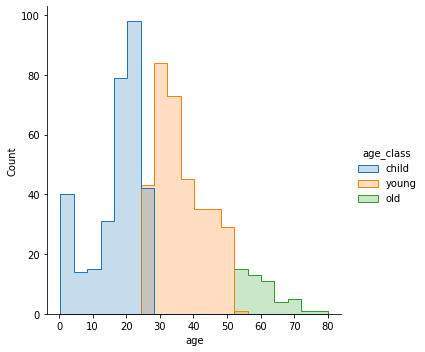

In [15]:
sns.displot(titanic, x='age', hue='age_class', element='step')

In [8]:
titanic['age_class'].value_counts()

young    345
child    319
old       50
Name: age_class, dtype: int64

타이타닉 데이터에의 age 컬럼을 대상으로 총 3개의 동일한 길이를 가지는 label을 생성한 것을 확인할 수 있고 동일한 길이로 잘랐기 때문에 label의 불균형이 발생하는 것을 알 수 있다.

In [16]:
titanic.groupby('age_class')['survived'].mean()

age_class
child    0.407524
young    0.417391
old      0.320000
Name: survived, dtype: float64

이렇게 범주형 데이터를 만들어 groupby를 통해 생존율을 분석할 수 있다.

# pd.qcut()
---

qcut 함수는 cut 함수와 다르게 동일한 길이로 구간을 나누는 개념이 아닌 동일한 갯수로 구간을 나누는 함수이다.

실제 예제를 통해 cut 함수와 무엇이 다른지 살펴보자

In [17]:
titanic = sns.load_dataset('titanic')

titanic['age_class'] = pd.qcut(titanic['age'], 3, labels=['child', 'young', 'old'])

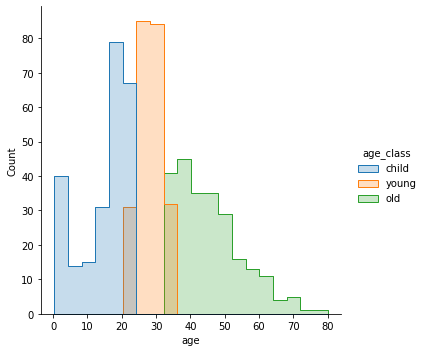

In [19]:
sns.displot(titanic, x='age', hue='age_class', element='step')

In [20]:
titanic['age_class'].value_counts()

child    246
old      236
young    232
Name: age_class, dtype: int64

위의 cut 함수와 다르게 qcut 함수는 동일한 갯수로 구간을 나누는 것을 확인할 수 있다.

In [21]:
titanic.groupby('age_class')['survived'].mean()

age_class
child    0.418699
young    0.400862
old      0.398305
Name: survived, dtype: float64

따라서 서로 다른 데이터를 그룹핑 했기 때문에 분석 결과에 있어서도 차이를 보일 수 있다.

qcut 함수를 별도의 함수로 만들어서 사용하고 싶다면 아래의 코드를 이용하자.

In [22]:
iris = sns.load_dataset("iris")

def q3cut(s):
    return pd.qcut(s, 3, labels = ["소","중","대"]).astype(str)

iris["petal_length_class"] = iris.groupby(iris.species).petal_length.transform(q3cut)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_length_class
0,5.1,3.5,1.4,0.2,setosa,소
1,4.9,3.0,1.4,0.2,setosa,소
2,4.7,3.2,1.3,0.2,setosa,소
3,4.6,3.1,1.5,0.2,setosa,중
4,5.0,3.6,1.4,0.2,setosa,소
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,소
146,6.3,2.5,5.0,1.9,virginica,소
147,6.5,3.0,5.2,2.0,virginica,소
148,6.2,3.4,5.4,2.3,virginica,중
